## 4.1 EDA and data preprocessing 	(5b) 

In [1]:
# Ako prve opiseme tento dataset. Dataset obsahuje snimky pluc. Tieto snimky su roztriedene na zaklade chorob na 3 kategorie
# Plucia cloveka s Covid-19, Viral Pneumonia a normálne zdravé plucia.

# toto je opis z konkretnej stranky z kade boli data stianuté.

# Content
# It is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images.


# About this directory
# It contains around 137 cleaned images of COVID-19 and 317 in total 
# containing Viral Pneumonia and Normal Chest X-Rays structured into the test and train directories.

In [2]:
# importy
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from pathlib import Path
folder = Path("./Covid19-dataset")


classes = ["Covid", "Viral Pneumonia", "Normal"]
train_dir_path = folder / "train"
test_dir_path = folder / "test"

- (A-4b)	EDA a data preprocessing pre Vami vybrané charakteristiky z datasetu 

In [3]:
# Najprv preskumanim struktury datasetu

# vypis velkosti konkretnych dat pre kazdu classu
for cls in classes:
    print(f"{cls} - Train Images: {len(os.listdir(train_dir_path/cls))}")
    print(f"{cls} - Test Images: {len(os.listdir(test_dir_path/cls))}")    

Covid - Train Images: 111
Covid - Test Images: 26
Viral Pneumonia - Train Images: 70
Viral Pneumonia - Test Images: 20
Normal - Train Images: 70
Normal - Test Images: 20


In [4]:
# Dalej si vypiseme a zobrazime graficky rozsah
# rozlisenia (pocet pixelov) pre classy
from PIL import Image

def visualize_resolutions(class_name: str, data_path: str):
    class_path = os.path.join(data_path, class_name)
    images_lst = os.listdir(class_path)
    
    resolutions = []

    # Iterate through images and collect resolutions
    for image_name in images_lst:
        image_path = os.path.join(class_path, image_name)
        try:
            # Load the image
            image = Image.open(image_path)
            # Get the resolution
            width, height = image.size
            resolutions.append((width, height))
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
    
    # Calculate resolution ranges
    widths = [res[0] for res in resolutions]
    heights = [res[1] for res in resolutions]
    
    width_range = (min(widths), max(widths))
    height_range = (min(heights), max(heights))
    
    print(f"Width range: {width_range}")
    print(f"Height range: {height_range}")
    
    # Visualize resolution distribution
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for individual resolutions
    plt.scatter(widths, heights, alpha=0.7, label="Image Resolutions")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title(f"Resolution Distribution for {class_name}")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Histogram of widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, alpha=0.7, color='blue', label="Widths")
    plt.xlabel("Width")
    plt.ylabel("Frequency")
    plt.title("Width Distribution")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, alpha=0.7, color='green', label="Heights")
    plt.xlabel("Height")
    plt.ylabel("Frequency")
    plt.title("Height Distribution")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Width range: (439, 4248)
Height range: (391, 4095)


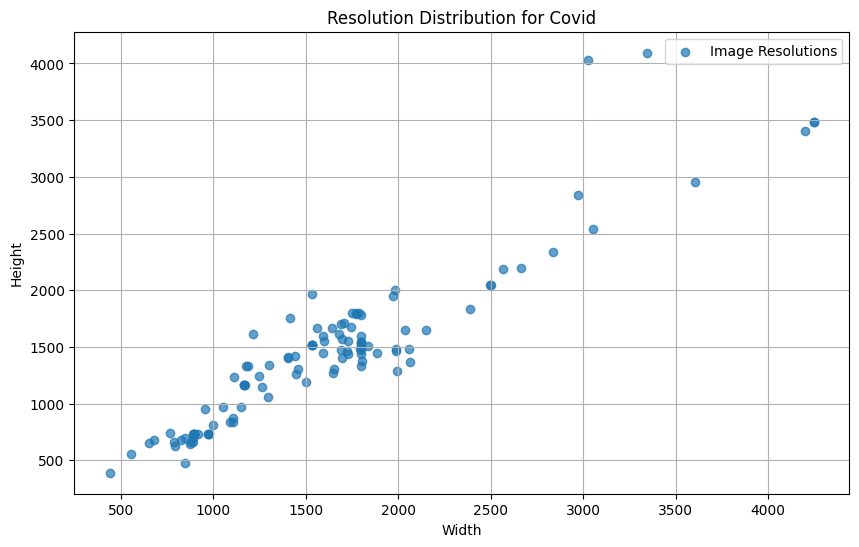

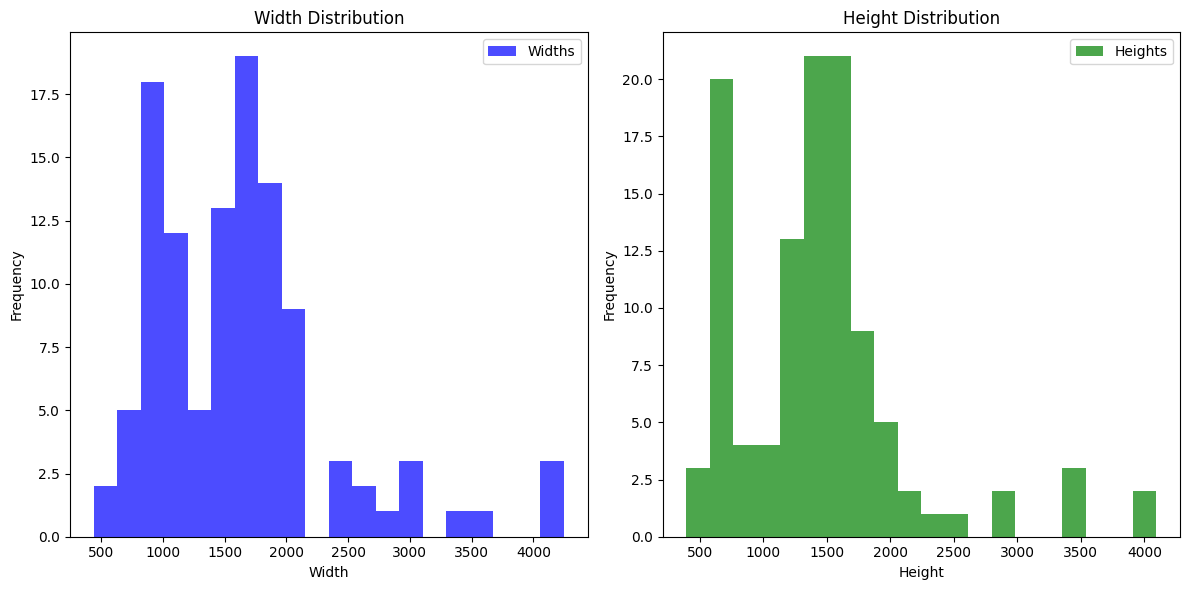

Width range: (1056, 2000)
Height range: (744, 1456)


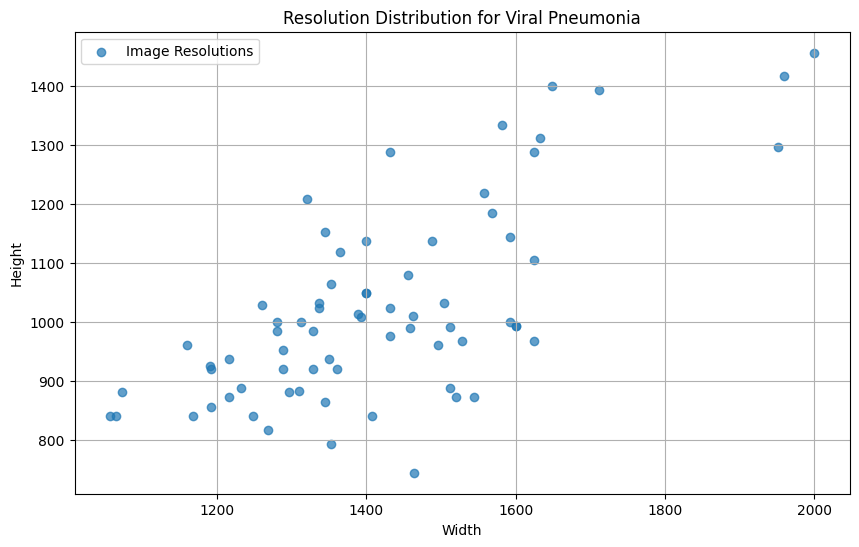

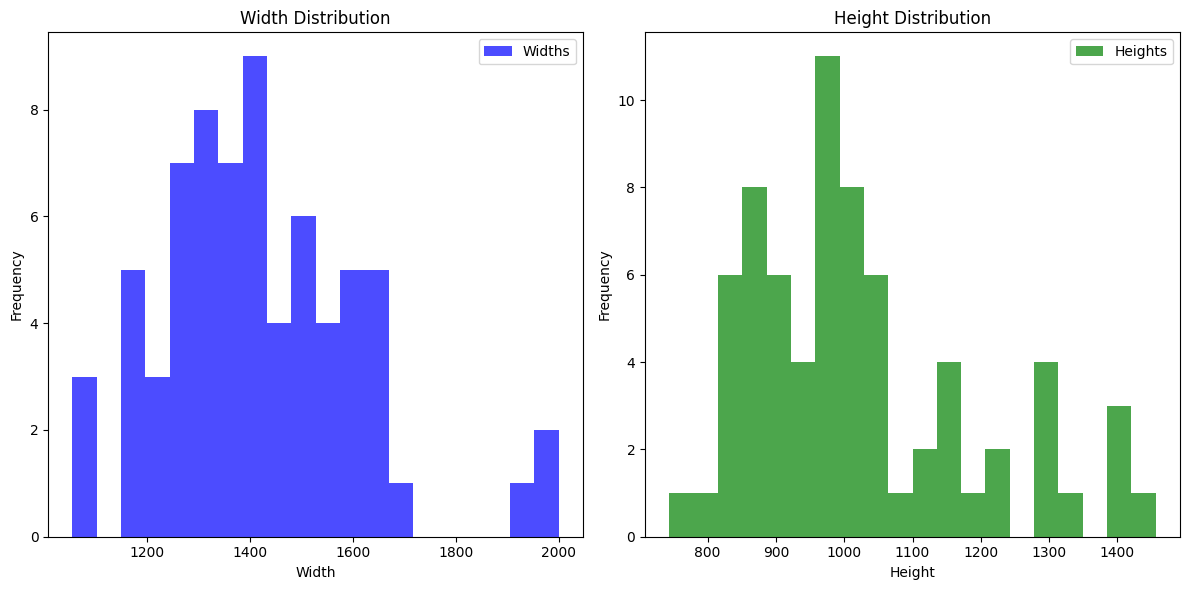

Width range: (1534, 2752)
Height range: (1063, 2713)


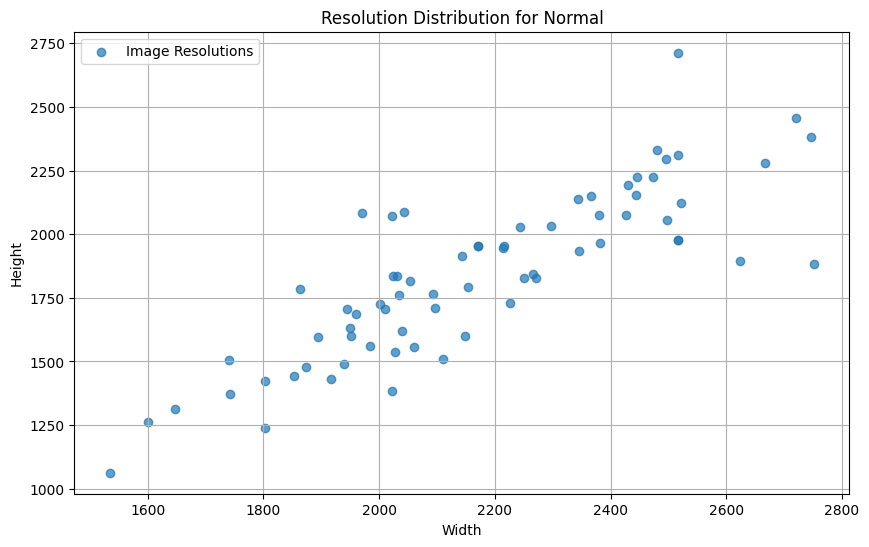

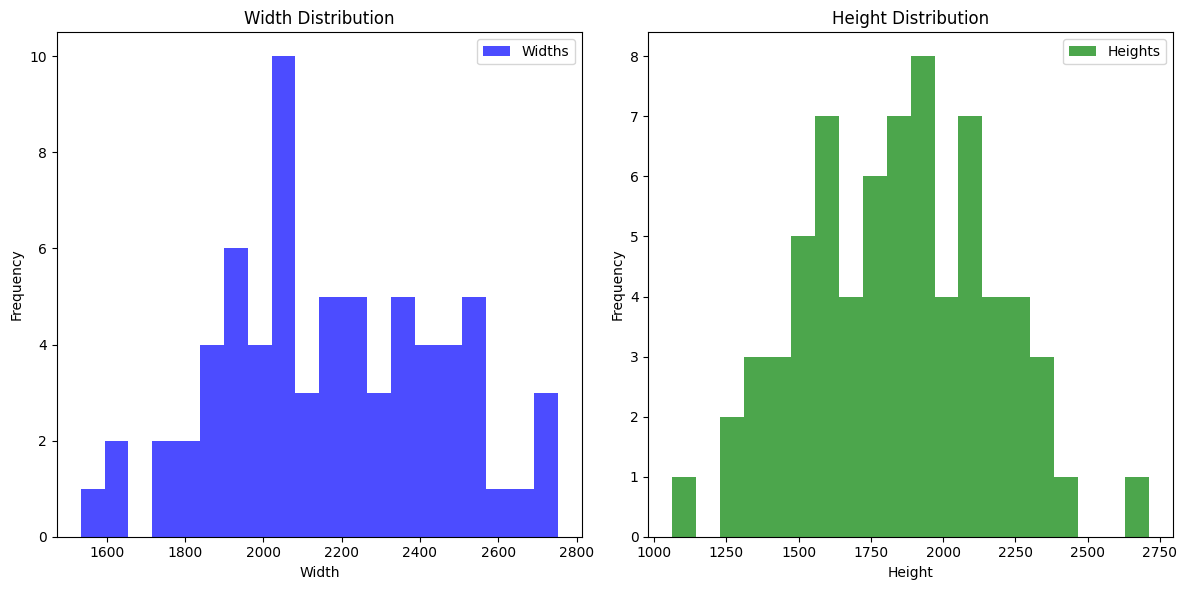

In [5]:
for cls in classes:
    visualize_resolutions(cls, train_dir_path)

In [6]:
from random import sample
# definujeme si funkciu ktora vizualizuje nahodne samples obrazkov
# zo zadanej classy
def visualize_samples(class_name: str, data_path: str, sample_size: int):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    images_sample = sample(images_lst, sample_size)
    plt.figure(figsize=(10, sample_size))
    for i, image_name in enumerate(images_sample):
        img_path = class_path/image_name
        img_arr = plt.imread(img_path)
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img_arr, cmap="gray")
        plt.title(class_name + " " + image_name)
        plt.axis("off")
    plt.show()

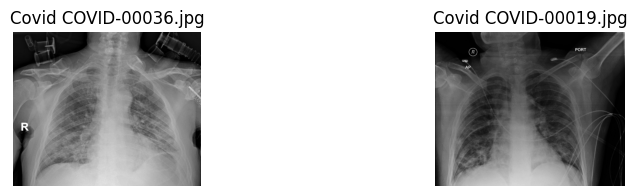

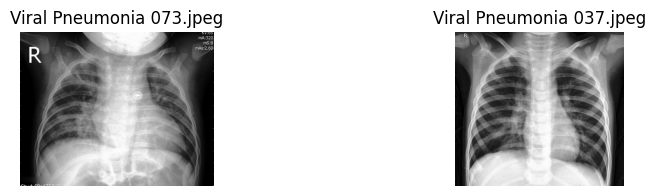

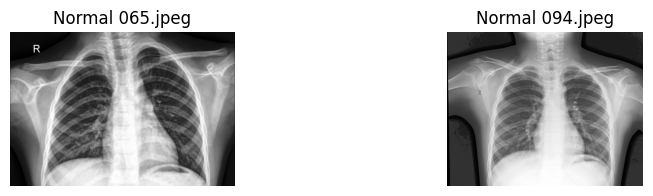

In [7]:
for cls in classes:
    visualize_samples(cls, train_dir_path, 2)

In [8]:
def is_grayscale(image_path):
    # Load the image
    image = Image.open(image_path)
    
    # Convert to numpy array
    img_array = np.array(image)
    
    # Check if it's an RGB image
    if image.mode == "RGB":
        # Compare all three channels (R, G, B) for equality
        if np.all(img_array[:, :, 0] == img_array[:, :, 1]) and np.all(img_array[:, :, 1] == img_array[:, :, 2]):
            return True
    return False

In [9]:
# na sample snimkoch mozme vidiet ze su obrazky 
# v grayscale, chceme sa ale presvedcit ci su 
# takehoto typu vsetky obrazky v datasete, 
# preto prejdeme celym datasetom a ziskame "rgb" mode
# alebo "L" mode ktore oznacuje grayscale

from collections import Counter

def print_color_modes(class_name: str, data_path:str):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    color_modes = []
    for image_name in images_lst:
        try:
            image = Image.open(class_path/image_name)
            if is_grayscale(class_path/image_name):
                color_modes.append("L")
            else:
                color_modes.append(image.mode)
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

    mode_counts = Counter(color_modes)
    print(f"Color modes in {class_name} class")
    for mode, count in mode_counts.items():
        print(f"{mode}: {count}")
    print()

In [10]:
for cls in classes:
    print_color_modes(cls, train_dir_path)


Color modes in Covid class
L: 102
RGBA: 5
RGB: 4

Color modes in Viral Pneumonia class
L: 70

Color modes in Normal class
L: 70



In [11]:
# 1st output:
# Color modes in Covid class
# RGB: 69
# RGBA: 5
# L: 37

# Color modes in Viral Pneumonia class
# RGB: 70

# Color modes in Normal class
# RGB: 70

# mozme vidiet ze vacsia cast snimkov su ulozene v RGB mode
# presnejsie 209/251, predtym ako vsetky convertujeme na grayscale
# sa ujistime ze RGB hodnoty pri RGB zakodovanych obrazkoch
# su hodnoty, co by vypocedalo ze su grayscale, aj ked su v RGB mode

# pridame funkciu a upravime povodnu funkciu na detekciu modov

In [12]:
#2nd output:
# Color modes in Covid class
# L: 102
# RGBA: 5
# RGB: 4

# Color modes in Viral Pneumonia class
# L: 70

# Color modes in Normal class
# L: 70

In [13]:
# Z 2. iteracie vysledkov mozme vidiet ze vacsina obrazkov je grayscale
# a preto je bezpecne prehlasit ze mozme zmenit celemu datasetu mode na gray scale
# pre konzistenciu, alebo s nim narabat tak, ze su vsetky obrazky rovnakeho typu

In [14]:
# este skontrolujeme v akom formate su snimky ulozene

def print_image_formats(class_name: str, data_path:str):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    formats = []
    for image_name in images_lst:
        
        formats.append(image_name.split(".")[-1])
    
    format_counts = Counter(formats)
    print(f"Image formats in {class_name} class")
    for img_format, count in format_counts.items():
        print(f"{img_format}: {count}")
    print()

In [15]:
for cls in classes:
    print_image_formats(cls, train_dir_path)

Image formats in Covid class
jpeg: 46
png: 8
jpg: 57

Image formats in Viral Pneumonia class
jpeg: 70

Image formats in Normal class
jpeg: 70



In [16]:
# mozme vidiet ze nemame konzistentne file formaty,
# co by nemuselo, ale mohlo v buducnosti vadit v nasom workflowe
# preto v jednej funkcii vsetky obrazky zmenine do graysclae modu "L"
# a taktiez ich convertujeme na konzistentny rovnaky
# file format


def convert_to_grayscale_and_save(source_folder, target_folder, target_format="JPEG"):

    os.makedirs(target_folder, exist_ok=True)
    
    for image_name in os.listdir(source_folder):
        try:
            # Define source and target paths
            image_path = source_folder / image_name
            new_name = os.path.splitext(image_name)[0] + ".jpg"
            target_path = target_folder / new_name
            
            # Open the image
            image = Image.open(image_path)
            
            # Convert to grayscale
            grayscale_image = image.convert("L")
            
            # Save in the target format
            grayscale_image.save(target_path, target_format)
            
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

In [17]:
save_path_train = Path("./Covid_preprocess/train/")
for cls in classes:
    convert_to_grayscale_and_save(train_dir_path/cls, save_path_train/cls)


In [18]:
save_path_test = Path("./Covid_preprocess/test/")
for cls in classes:
    convert_to_grayscale_and_save(test_dir_path/cls, save_path_test/cls)


# Hlavne vystupy a pozorovania z EDA

1. Dataset ma 3 triedy snimkov pluc (Covid-19, Viral Pneumonia, Normal)
2. Konkrétne počty tried sú:
    1. 137 - Covid-19
    2. 317 - Pneumonia + Normal
    - Data sú už predom rozdelené na trénovacie (~79%) a testovacie ~(21%)
3. Pôvodné snimky boli vsetky už čiernobiele, všetky sme preiterovali a zmenili ich mode na "L" grayscale pre konzistentnosť ( Toto je už čast preprocesingu [hups?])
4. Snímky boli uložené v rôzných file formátoch, pre konzistentnosť sme ich všetky uložili do jednotného formátu .jpg
5. Na grafoch a vo výpisoch môžme vidieť aj diverzitu v rozlíšeniach jednotlivých skupín snímkov

## Časť preprocesingu

V následujúcej časti budeme vykonávať následujúce metódy preprocesingu. (na poradí datých techník záleží).
1. Grayscaling (táto časť bola už vykonaná v rámci EDA)
2. Redukcia Šumu - (Gaussian Blur alebo Median Filtering), zabráni zosilnenie šumu v procese ostrenia
3. Zaostrovanie - (Convolution filters for edge enhancement)
4. Resizing - vsetky snimky budeme skalovat do rovnakych rozmerov (224x224px) zachováva jednotnosť nižšie "rozšírených" obrázkov. 
5. Data Augmentation - obrazky budeme horizontalne otáčať, keďže vertikálne by nebolo vhodné keďže ide o ľudské plúca a výskit srdca na snímke by mohlo poškodiť/ovplyvniť trénovanie modelu
6. Binarizácia
7. Normalizacia pixelov - pre kazdu snimku normalizujeme pixely na hodnoty medzi [0,1] alebo [-1, 1]

Následujúce poradie by sme mohli ešte trocha zmeniť, ako napríklad performovať resizing ako prvý. Potom by sa ostatne techniky robili na značne menších rozmeroch a teda by sa čas vykonanie preprocessingu značne znížil, no kvalita niektorých procesov by sa mohla znížiť. V prvom pokuse necháme teda toto poradie a prípadne ho zmenime ak narazíme na problem s výpočtovým časom.

## 1. Grayscaling (Hotový v EDA časti)

## 2. Redukcia šumu

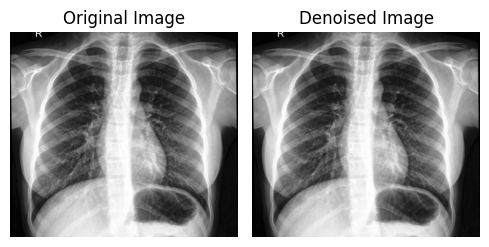

In [ ]:
import cv2
import numpy as np

def reduce_noise(image):
    if isinstance(image, Image.Image):
        image = np.array(image)
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised_image


normal_image_path = Path("Covid_preprocess/train/Normal/020.jpg")
original_image = Image.open(normal_image_path)


original_image_np = np.array(original_image)


denoised_image = reduce_noise(original_image)


plt.figure(figsize=(5, 3))


plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Zaostrovanie

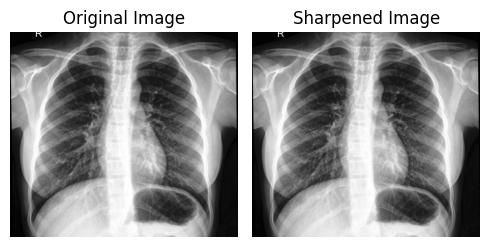

In [ ]:
def sharpen_image(image):
    
    if isinstance(image, Image.Image):
        image = np.array(image)
    kernel = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image


sharpened_image = sharpen_image(original_image)


plt.figure(figsize=(5, 3))


plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Resizing (224x224)

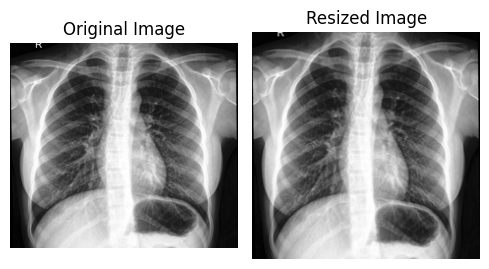

In [ ]:
from PIL import Image

def resize_image(image, output_size=(224, 224)):
    return image.resize(output_size)


original_image_np = np.array(original_image)


resized_image = resize_image(original_image)


plt.figure(figsize=(5, 3))


plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray' if original_image.mode == "L" else None)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(np.array(resized_image), cmap='gray' if resized_image.mode == "L" else None)
plt.title("Resized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Data Augmentation (horizontal flipping)

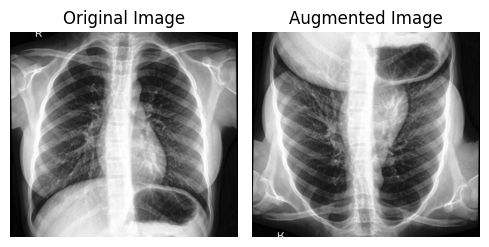

In [ ]:
import random

def augment_image(image):
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_TOP_BOTTOM)
    return image


augmented_image = augment_image(original_image)


plt.figure(figsize=(5, 3))


plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(augmented_image, cmap='gray')
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 6. Binarizácia

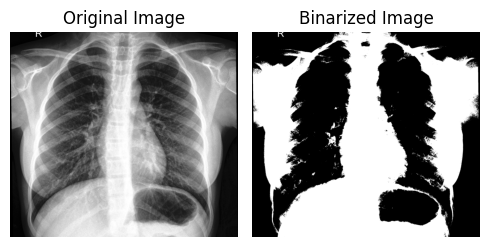

In [ ]:
def binarize_image(image, threshold=128):
    if isinstance(image, Image.Image):
        if image.mode != "L":
            image = image.convert("L") # ensure grayscale
        image = np.array(image)
    _, binarized_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binarized_image

original_image_np = np.array(original_image)


binarized_image = binarize_image(original_image)


plt.figure(figsize=(5, 3))


plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray' if original_image.mode == "L" else None)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(binarized_image, cmap='gray')
plt.title("Binarized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Normalizácia

In [24]:
def normalize_image(image):
    if isinstance(image, Image.Image):
        image = np.array(image)
    normalized_image = image / 255.0
    return normalized_image

# Example usage
normalized_image = normalize_image(binarized_image)
print(normalized_image)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


toto boli samostatne metody, my ale chceme tieto metody spolocne vyuzit takze si vytvorime jednoduchu pipe

In [25]:
def preprocess_image_resize_first(image_path):
    image = Image.open(image_path)
    image = resize_image(image)
    image = reduce_noise(image)
    image = sharpen_image(image)
    image = augment_image(image)
    image = binarize_image(image)
    # image = normalize_image(image)
    return image

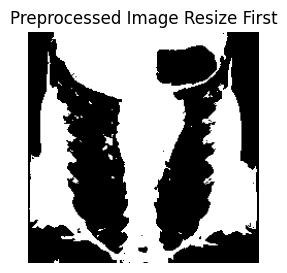

In [26]:
# Example
image_path = "Covid_preprocess/train/Normal/020.jpg"
preprocessed_image = preprocess_image_resize_first(image_path)

# Display preprocessed image
plt.figure(figsize=(5, 3))
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Preprocessed Image Resize First")
plt.axis('off')
plt.show()



In [27]:
def preprocess_image_resize_trd(image_path):
    image = Image.open(image_path)
    image = reduce_noise(np.array(image))
    image = sharpen_image(image)
    image = resize_image(Image.fromarray(image))
    # image = augment_image(image)
    # image = binarize_image(image)
    image = normalize_image(image)
    return image

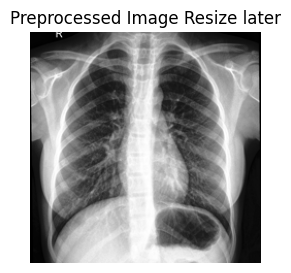

In [28]:
# Example
image_path = "Covid_preprocess/train/Normal/020.jpg"
preprocessed_image = preprocess_image_resize_trd(image_path)

# Display preprocessed image
plt.figure(figsize=(5, 3))
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Preprocessed Image Resize later")
plt.axis('off')
plt.show()

## Zaver Preprocessingu
V zavere preprocessingu mozme vidiet ze pipeline v ktorej resizujeme snimky neskor zachovavaju viac detailov a nie su skoro takmer viac casovo narocnejsie na vykonanie preto pouzijeme na preprocessing vsetkych trenovacich aj testovacich dat tuto pipeline

In [ ]:
# nasledujuci kod sa bude vyuzivat na dynamicke priame preprocesovanie dat pomocou 
# pipeline bez ukladania preprocesovanych dat na disk ale iba v premennych

import os
import numpy as np

def create_dataset(data_dir, label_map):
    X = []
    y = []

    
    for class_name, label in label_map.items():
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                
                preprocessed_image = preprocess_image_resize_trd(image_path)
                X.append(preprocessed_image)
                y.append(label)
            except Exception as e:
                print(f"Error processing {image_name}: {e}")

    
    X = np.array(X)
    y = np.array(y)

    # Shuffle the dataset while keeping images and labels aligned
    indices = np.arange(len(X))  
    np.random.shuffle(indices) 
    X = X[indices]  
    y = y[indices]  

    return X, y


In [30]:
# Usage on ALL Training data
train_data_dir = "Covid_preprocess/train"
label_map = {"Covid": 0, "Normal": 1, "Viral Pneumonia": 2}

X_train, y_train = create_dataset(train_data_dir, label_map)

In [31]:
# Usage on ALL Test data
test_data_dir = "Covid_preprocess/test"

X_test, y_test = create_dataset(test_data_dir, label_map)

Este overime aku strukturu maju ulozene data predtym ako to budeme pasovat do modelu

In [32]:
X_train.shape
# (312, 224, 224) -> mame 312 snimkov v rozmeroch 224x224
# nemame 4. dimenziu kde by normalne boli RGB kanaly, 
# pretoze po preprocessingu mame vsetky snimky v grayscale

(312, 224, 224)

In [33]:
X_train[0] # mozme vidiet ze data su normalizovane medzi (0 a 1)

array([[0.03529412, 0.03137255, 0.03137255, ..., 0.02745098, 0.02745098,
        0.03137255],
       [0.03529412, 0.03137255, 0.02745098, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.03137255, 0.03137255, 0.03137255, ..., 0.02745098, 0.03137255,
        0.03137255],
       ...,
       [0.04313725, 0.04313725, 0.04313725, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.04313725, 0.04313725, 0.04313725, ..., 0.01176471, 0.01176471,
        0.01176471],
       [0.04705882, 0.04313725, 0.04705882, ..., 0.01568627, 0.01176471,
        0.01176471]])

In [34]:
y_train.shape
# (312,) -> mame 312 zakodovanych lables
# label_map = {"Covid": 0, "Normal": 1, "Viral Pneumonia": 2}
# hodnota v arrayi y_train zodpoveda labelu ktory je namapovany

(312,)

In [35]:
label_map_reverse = {0:"Covid", 1:"Normal", 2:"Viral Pneumonia"}

In [36]:
# definujeme funkciu ktora zobrazi preprocesnuty image aj s nazvom

def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index], cmap="gray")
    plt.xlabel(label_map_reverse[y[index]])

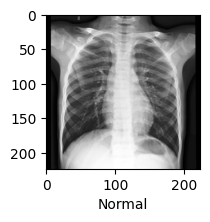

In [37]:
plot_sample(X_train, y_train, 5)

- (B-1b)	Zdôvodnite výber ML/DL metód vzhľadom na Vami vybraný dataset pre 4.2

# 4.1 B
ako model sme zvolili CNN pretoze je idealny pre image data a nasim cielom je image classification. CNN pomocou filtrov extrahuje uzitocne crty obrazku a filtre sa automaticky nastavia pocas trenovania Neuronky.

## 4.2. Modeling and evaluation (5b)


- (A-4b)	Modeluje Vami tie vybrané charakteristiky pomocou vhodných ML/DL	metód. Výsledok modelovania je najlepší model.


In [39]:
# zacneme basic jednoduchym modelom
from tensorflow.keras import models, layers

ann = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


c:\Users\Asus\iau_project\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3261 - loss: 3.0210
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4796 - loss: 1.0591
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5724 - loss: 0.8637
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6126 - loss: 0.8899
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6754 - loss: 0.6951


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("classific report: \n", classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
classific report: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        26
           1       0.36      0.25      0.29        20
           2       0.52      0.85      0.64        20

    accuracy                           0.62        66
   macro avg       0.62      0.61      0.59        66
weighted avg       0.66      0.62      0.62        66



# 1. Iteracia CNN

In [41]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


c:\Users\Asus\iau_project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.3781 - loss: 2.2444 - val_accuracy: 0.6970 - val_loss: 0.7073
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.8504 - loss: 0.5382 - val_accuracy: 0.8485 - val_loss: 0.3821
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.8874 - loss: 0.3022 - val_accuracy: 0.8636 - val_loss: 0.2445
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.9084 - loss: 0.2182 - val_accuracy: 0.9697 - val_loss: 0.1040
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.9753 - loss: 0.0933 - val_accuracy: 1.0000 - val_loss: 0.0709


In [42]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0705


# Po 1. Iteracii CNN
po trenovani 1. cnn modelu mozme vidiet 100% accuracy na testovacich datach co "smrdi" overfitom, preto vyskusame najskor pridanie dropoutov, ktore urcite neurony s danou pravdepodobnostou "vypnu" tymto sa znizi sanca overfitu 

# 2. Iteracia CNN (pridanie dropout)

In [43]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),


    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),


    #dense
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.3690 - loss: 4.9258 - val_accuracy: 0.3939 - val_loss: 1.0677
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.5455 - loss: 1.0359 - val_accuracy: 0.6515 - val_loss: 1.0661
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.6941 - loss: 0.9268 - val_accuracy: 0.7121 - val_loss: 0.7530
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.7212 - loss: 0.6365 - val_accuracy: 0.8182 - val_loss: 0.4694
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.7839 - loss: 0.5270 - val_accuracy: 0.9242 - val_loss: 0.3336


In [44]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9387 - loss: 0.3204


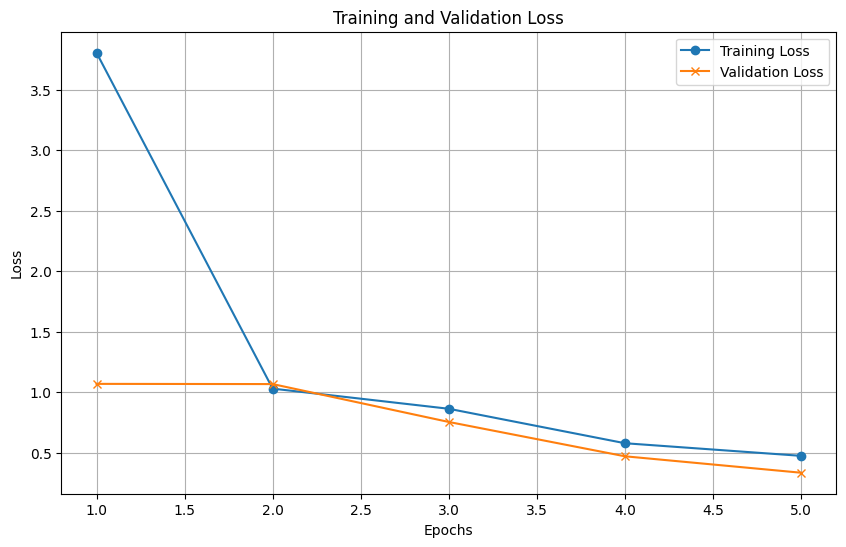

In [45]:
import matplotlib.pyplot as plt

# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Po 2. Iteracii CNN
na vysledkoch mozme vidiet znizenie accuracy na train aj test datach co znaci znizenie alebo eliminovanie overfitu. Mozme taktiez na grafoch pozorovat znizujuce sa loss funkcie a teda vidime ze by nemalo dochadzat k overfittingu pri 5 epochoch a tomto nastaveni modela

V 3. iteracii pouzijeme hyperparameter tuning 

# 3. Iteracia CNN (tuning)

rozhodli sme sa nahadzat nejake parametre pre tuning

```py
param_grid = {
    'learning_rate': [0.005, 0.001, 0.0005],
    'dropout_rate': [0.25, 0.3, 0.5],
    'dense_units': [32, 64, 128],
    'convolution_filters': [32, 64, 128]
}
```

pre toto by ale gridsearch trval az moc dlho pre pravdepodobne este nie dokonale vysledky, skratka by sa to nevyplatilo, preto sme sa rozhodli pouzit Bayesian Optimization.


In [46]:
import keras_tuner as kt
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

# Define the model-building function
def build_model(hp):
    model = models.Sequential([
        layers.Conv2D(
            filters=hp.Int('filters_1', min_value=16, max_value=128, step=16),
            kernel_size=(3, 3),
            activation='relu',
            input_shape=(224, 224, 1)
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(hp.Float('dropout_1', min_value=0.25, max_value=0.5, step=0.1)),

        layers.Conv2D(
            filters=hp.Int('filters_2', min_value=16, max_value=128, step=16),
            kernel_size=(3, 3),
            activation='relu'
        ),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)),

        layers.Flatten(),
        layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        layers.Dropout(hp.Float('dropout_3', min_value=0.25, max_value=0.5, step=0.1)),
        layers.Dense(3, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
# Define the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=15, 
    directory='my_tuner_dir',
    project_name='cnn_bayesian_optimization',
    overwrite=True
)

# Perform the search
tuner.search(
    X_train, y_train,
    epochs=7,
    validation_data=(X_test, y_test),
    verbose=1
)

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

pd.DataFrame([_.values for _ in tuner.get_best_hyperparameters(5)])

# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()
history = best_model.fit(
    X_train, y_train,
    epochs=7,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

Trial 15 Complete [00h 00m 54s]
val_accuracy: 0.8787878751754761

Best val_accuracy So Far: 0.9696969985961914
Total elapsed time: 00h 12m 02s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 96)   │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 279936)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │    26,873,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,902,307 (102.62 MB)

 Trainable params: 26,902,307 (102.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.3507 - loss: 12.8685 - val_accuracy: 0.6667 - val_loss: 0.9535
Epoch 2/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 433ms/step - accuracy: 0.6282 - loss: 0.8498 - val_accuracy: 0.6970 - val_loss: 0.6707
Epoch 3/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.7606 - loss: 0.5935 - val_accuracy: 0.8030 - val_loss: 0.5350
Epoch 4/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.8905 - loss: 0.3501 - val_accuracy: 0.8788 - val_loss: 0.3221
Epoch 5/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step - accuracy: 0.8913 - loss: 0.3259 - val_accuracy: 0.8788 - val_loss: 0.2996
Epoch 6/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.9200 - loss: 0.2452 - val_accuracy: 0.9848 - val_loss: 0.1534
Epoch 7/7
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.9385 - loss: 0.1730 - val_accuracy: 1.0000 - val_loss: 0.0985
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0928
Test Accuracy: 1.0, Test Loss: 0.09853

In [48]:
def plot_graphs(history):
    plt.subplots(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show()

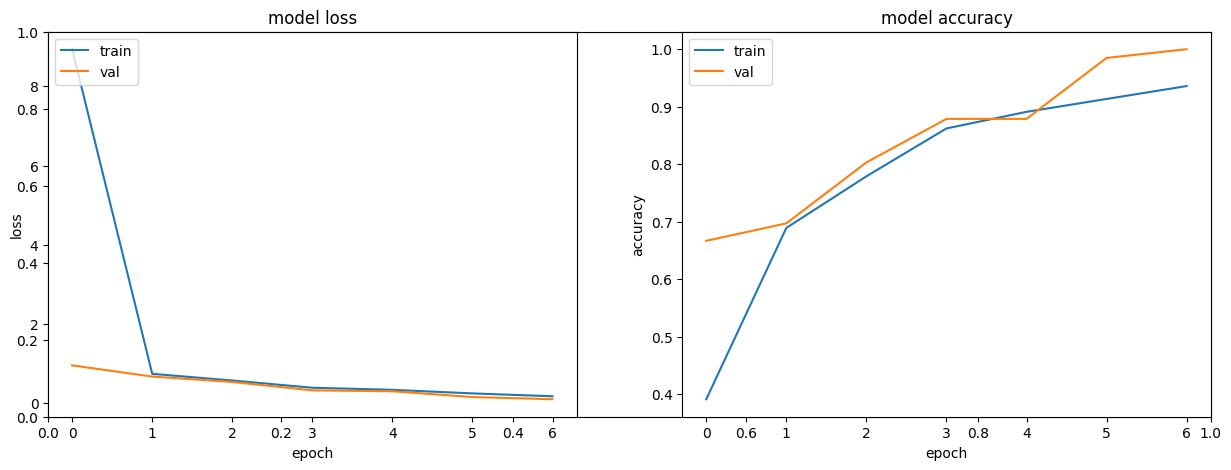

In [49]:
plot_graphs(history)

In [50]:
model = tuner.hypermodel.build(best_hps)
best_model_history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


val_acc_per_epoch = best_model_history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(f'Best epoch: {best_epoch}')

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 482ms/step - accuracy: 0.3112 - loss: 17.6660 - val_accuracy: 0.3333 - val_loss: 1.0997
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.4519 - loss: 1.0914 - val_accuracy: 0.7302 - val_loss: 1.0231
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.5878 - loss: 0.9465 - val_accuracy: 0.8730 - val_loss: 0.6841
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step - accuracy: 0.7784 - loss: 0.5976 - val_accuracy: 0.8571 - val_loss: 0.4176
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.8464 - loss: 0.3956 - val_accuracy: 0.8730 - val_loss: 0.4087
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - accuracy: 0.8231 - loss: 0.3966 - val_accuracy: 0.8413 - val_loss: 0.3987
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.9015 - loss: 0.2803 - val_accuracy: 0.9048 - val_loss: 0.2675
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.9322 - loss: 0.2571 - val_accuracy: 0.9206 - val_loss

In [51]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/8


c:\Users\Asus\iau_project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 519ms/step - accuracy: 0.3885 - loss: 23.4071 - val_accuracy: 0.2698 - val_loss: 1.0978
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - accuracy: 0.4412 - loss: 1.0580 - val_accuracy: 0.6825 - val_loss: 0.8240
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.7388 - loss: 0.6960 - val_accuracy: 0.6825 - val_loss: 0.7957
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 453ms/step - accuracy: 0.7298 - loss: 0.6386 - val_accuracy: 0.8730 - val_loss: 0.4457
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 449ms/step - accuracy: 0.8537 - loss: 0.3784 - val_accuracy: 0.8730 - val_loss: 0.3526
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.8757 - loss: 0.3479 - val_accuracy: 0.8413 - val_loss: 0.4259
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.8569 - loss: 0.3813 - val_accuracy: 0.8730 - val_loss: 0.3433
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.9010 - loss: 0.2804 - val_accuracy: 0.9048 - val_loss: 0.2827


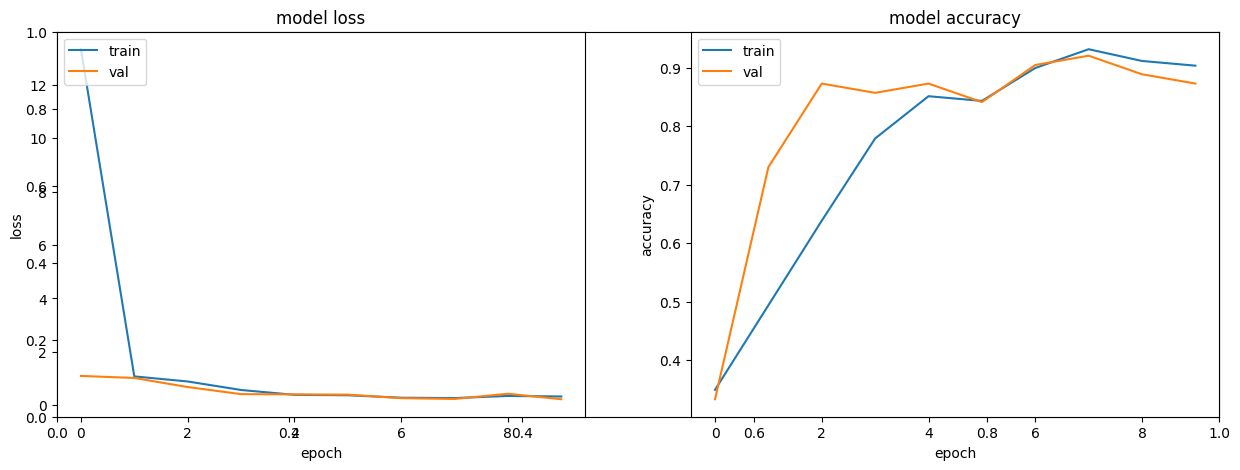

In [52]:
plot_graphs(best_model_history)

In [54]:
eval_result = hypermodel.evaluate(X_test, y_test)
print(f'[test loss, test accuracy]: {eval_result}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9116 - loss: 0.2721
[test loss, test accuracy]: [0.30914589762687683, 0.9090909361839294]


- (B-1b)	Zhodnotíte Váš prístup a získaný výsledok	

pocas EDA sme skontrolovali data a zoznamili sa s datasetom. poceas preprocessingu sme definovali rozne funkcie na preprocess snimok. pozorovali sme rozdiel medzi pipeline kde bol scaling obrazka 1. a kde bol az po redukcii sumu a zaostrovani. taktiez sme prvy primitivny model bez CNN vrstiev skusali na roznych kombinaciach preprocessingu. Rozhodli sme sa vykomenovat augmentaciu dat. Dalej sme presli 3. iteraciami vytvarania modelu kedy sme sa snazili preist overfittu a maximalizovat accuracy. vysledkom je najlepsi model pre classifikaciu xray snimku pluc na zistenie normal, pneumonia a covid-19 chorob. 

## Podiel prace
Filip Zubaj 50%
Milan Mikulaš 50%